# Camera Calibration with OpenCV

## run the code in the cell below to extract object points and image points for camera calibration.

- "Image points" are the coordinates of the grid corners in the image. Those are given in pixel scale.

- "Object points" are the coordinates of the grid corners in "object space", that is, their position relative to each other.

- So for example, you could have the top-left corner at image coordinates (127, 265), and its object coordinates would be (0, 0), since the top-left corner is the first across both axes. The next corner to its right could have coordinates (145, 263), and its object coordinates would be (1, 0) (that is, the corner on the second column, first row), etc.


In [1]:
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [6]:
import numpy as np
import cv2

# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((6*8,3), np.float32)
objp[:,:2] = np.mgrid[0:8, 0:6].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d points in real world space
imgpoints = [] # 2d points in image plane.

# Make a list of calibration images
images = glob.glob('Gopro 4/GO*.JPG')

# Step through the list and search for chessboard corners
for idx, fname in enumerate(images):
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (8,6), None)

    # If found, add object points, image points
    if ret == True:
        objpoints.append(objp)
        imgpoints.append(corners)

        # Draw and display the corners
        cv2.drawChessboardCorners(img, (8,6), corners, ret)
        
        #write_name = 'corners_found'+str(idx)+'.jpg'
        #cv2.imwrite(write_name, img)
        cv2.imshow('img', img)
        cv2.waitKey(500)

cv2.destroyAllWindows()

## show image

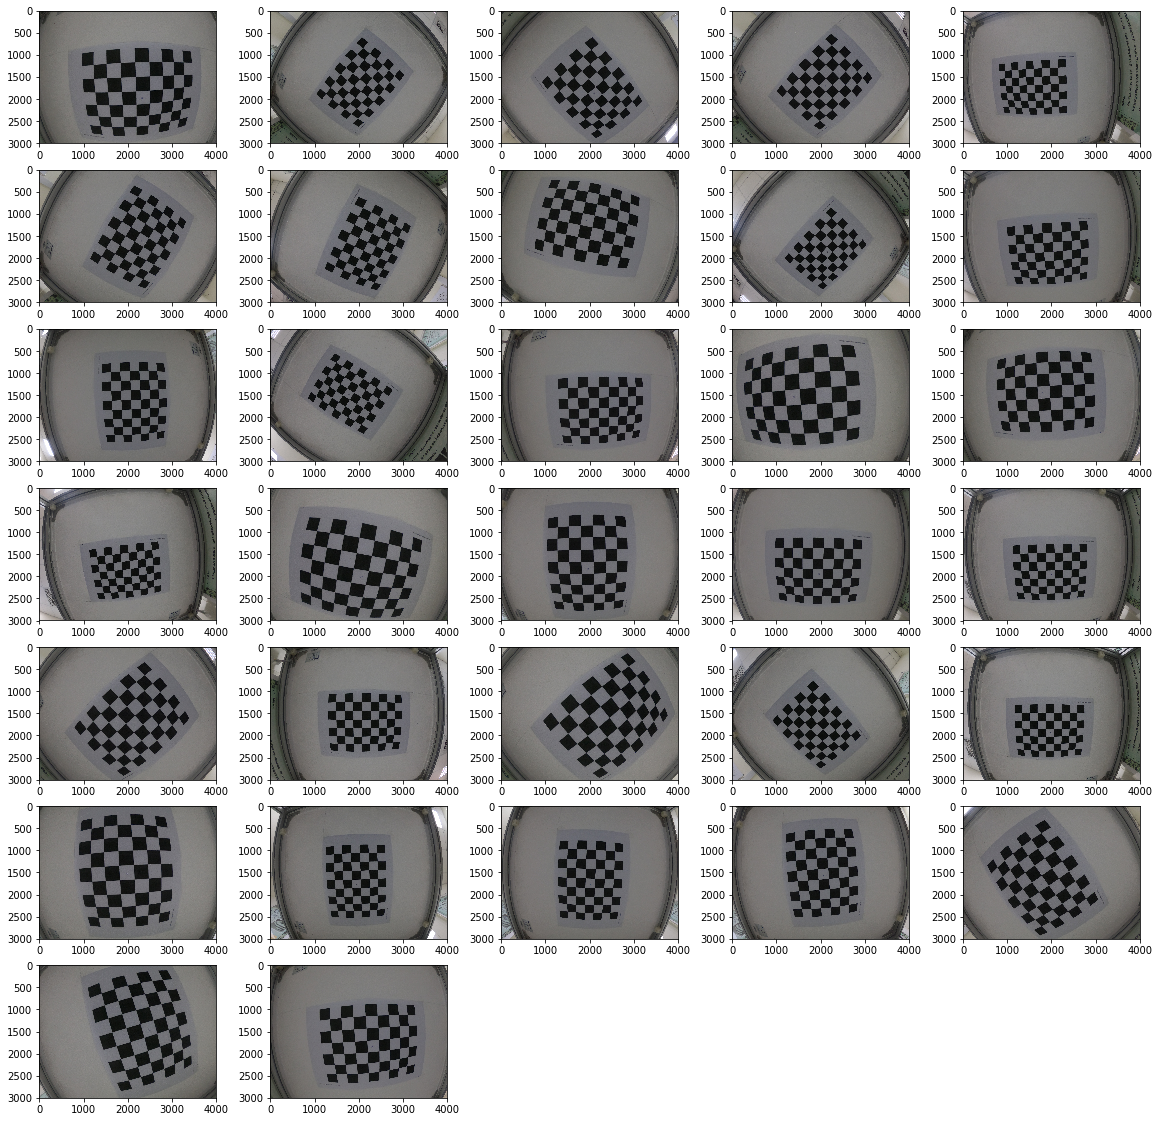

In [9]:
images = []
for img_path in glob.glob('Gopro 4/GO*.JPG'):
    images.append(mpimg.imread(img_path))

plt.figure(figsize=(20,20))
columns = 5
for i, image in enumerate(images):
    plt.subplot(len(images) / columns + 1, columns, i + 1)
    plt.imshow(image)

## show image comparison

Text(0.5,1,'Undistorted Image')

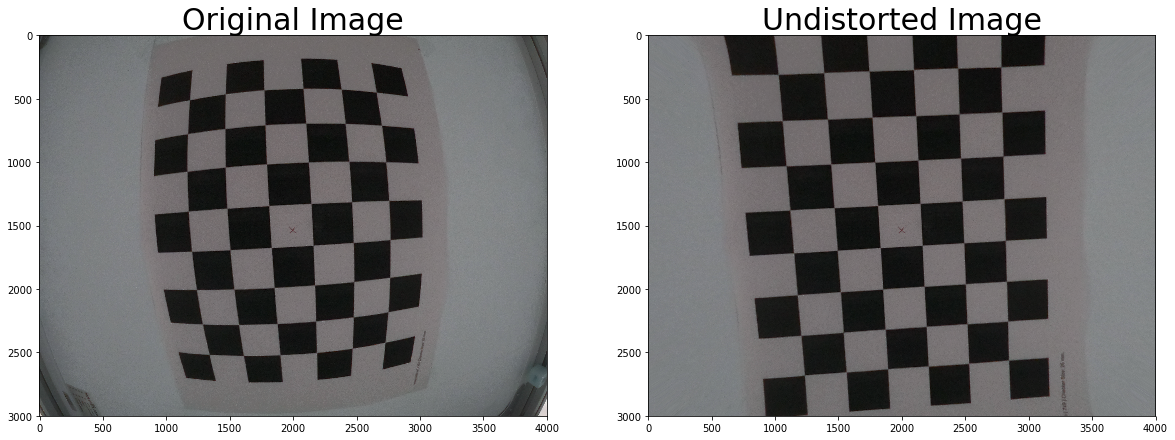

In [10]:
import pickle
%matplotlib inline

# Test undistortion on an image
img = cv2.imread('Gopro 4/GOPR0724_1609865357106.JPG')
img_size = (img.shape[1], img.shape[0])

# Do camera calibration given object points and image points
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img_size,None,None)


dst = cv2.undistort(img, mtx, dist, None, mtx)
cv2.imwrite('GOPR0032.jpg',dst)

#dst = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)
# Visualize undistortion
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(dst)
ax2.set_title('Undistorted Image', fontsize=30)

In [11]:
print (ret)

2.1725719837424364


In [12]:
print (mtx)

[[3.99277910e+03 0.00000000e+00 1.99733976e+03]
 [0.00000000e+00 4.00919140e+03 1.53392696e+03]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]


In [13]:
print (dist)

[[-1.53706348e+00  3.73714130e+00 -3.68355810e-03 -7.85037529e-04
  -6.06216526e+00]]


## save data calibration result

In [5]:
import pickle
dist_pickle = {}
dist_pickle["mtx"] = mtx
dist_pickle["dist"] = dist
pickle.dump( dist_pickle, open( "calibration_wide/wide_dist_pickle.json", "wb" ) )
print('saved')

saved


ref = https://docs.opencv.org/master/d9/d0c/group__calib3d.html#ga3207604e4b1a1758aa66acb6ed5aa65d

In [ ]:
import json
